<div align="center">

# IEE352 - Laboratorio 4  
## Sección Computacional - H0791  
### Asto Clemente, Mayte - 20210548  

</div>


## PREGUNTA 1

### a) Cargar la señal EMG y graficarla en el dominio del tiempo. Calcular la transformada de Fourier y graficar la magnitud de la respuesta en frecuencia de la señal, destacando el ruido a 60 Hz mediante líneas verticales.

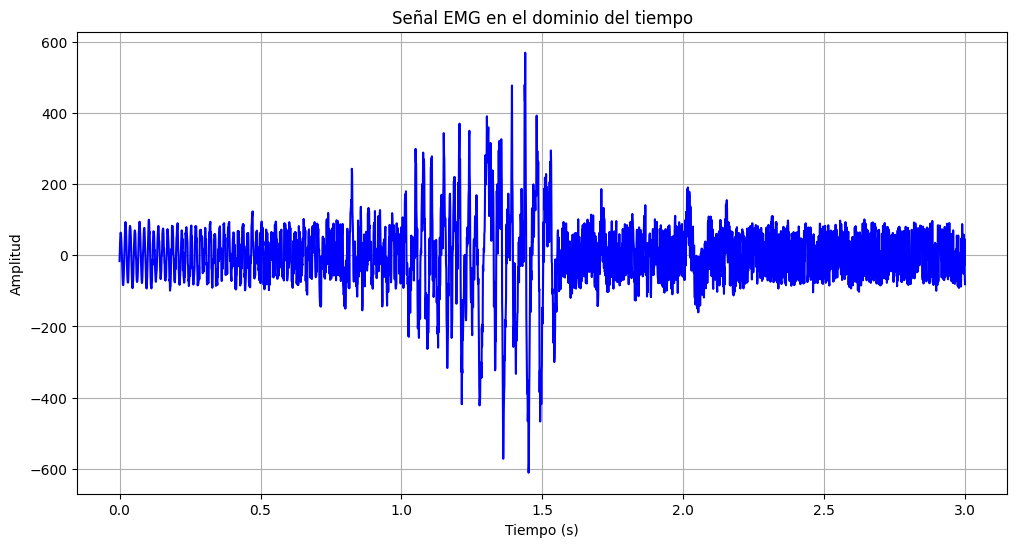

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Se carga la señal EMG
emg_signal = np.load('EMG_raw.npy')

# Parámetros
sampling_rate = 1000  # Frecuencia de muestreo en Hz
time = np.arange(len(emg_signal)) / sampling_rate  # Vector de tiempo

# Grafica de la señal EMG en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.plot(time, emg_signal, color='blue')
plt.title("Señal EMG en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



#### La gráfica muestra los cambios de amplitud en un registro electromiográfico cuando el músculo se encuentra en reposo y cuando se encuentra en una contracción muscular (se evidencia en las amplitudes de mayor intensidad)

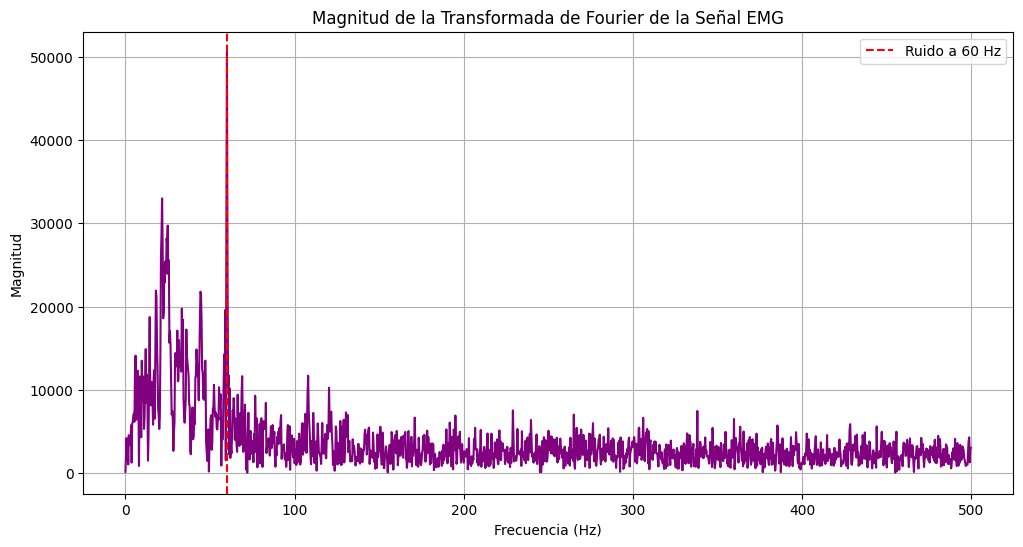

In [12]:
# Transformada de Fourier de la señal
frequencies = np.fft.fftfreq(len(emg_signal), 1 / sampling_rate)
emg_fft = np.fft.fft(emg_signal)
magnitude_spectrum = np.abs(emg_fft)

# Grafica de la magnitud de la respuesta en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], magnitude_spectrum[:len(frequencies)//2], color='purple')
plt.axvline(x=60, color='red', linestyle='--', label='Ruido a 60 Hz')
plt.title("Magnitud de la Transformada de Fourier de la Señal EMG")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()


#### La componente de ruido es notoria en la frecuencia 60 Hz, esto se muestra en la lina vertical punteada de rojo. 

### b) Diseñar un filtro FIR utilizando el método de ventanas con una ventana de Hamming, con frecuencia de corte de 50 Hz y 33 coeficientes. Graficar la respuesta impulsiva, su magnitud y fase de la respuesta en frecuencia para ambas ventanas, comparándolas con la respuesta ideal

C:\Users\HP\AppData\Local\Temp\ipykernel_17128\3891073441.py:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(fir_coefficients, basefmt=" ", use_line_collection=True)


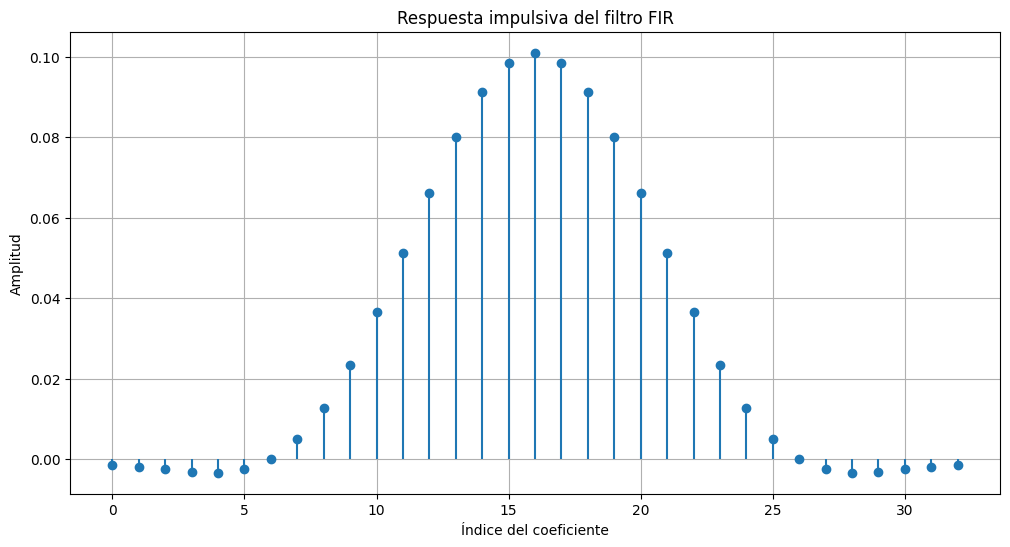

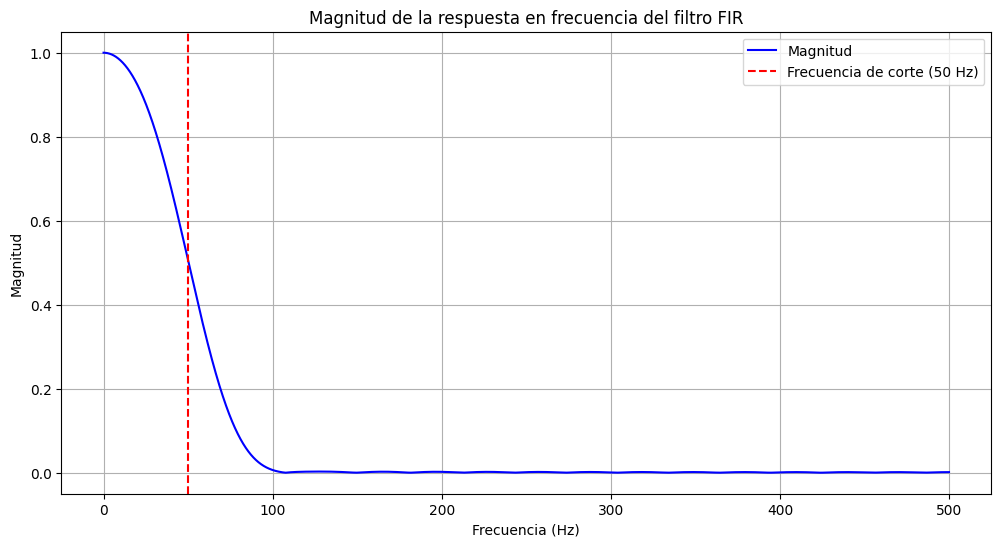

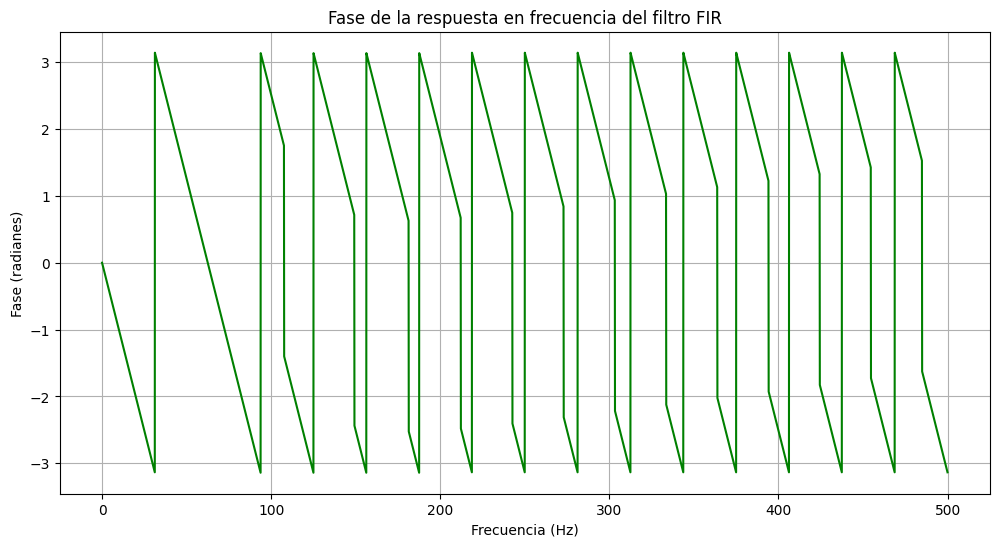

In [17]:
from scipy.signal import firwin, freqz

# Diseño del filtro FIR con ventana de Hamming
num_taps = 33 # Número de coeficientes
cutoff_frequency = 50  # Frecuencia de corte en Hz
fir_coefficients = firwin(num_taps, cutoff=cutoff_frequency, fs=sampling_rate, window="hamming")

# Respuesta en frecuencia del filtro
w, h = freqz(fir_coefficients, worN=8000, fs=sampling_rate)

# Grafica de la respuesta impulsiva del filtro
plt.figure(figsize=(12, 6))
plt.stem(fir_coefficients, basefmt=" ", use_line_collection=True)
plt.title("Respuesta impulsiva del filtro FIR")
plt.xlabel("Índice del coeficiente")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Grafica de la magnitud y fase de la respuesta en frecuencia del filtro
plt.figure(figsize=(12, 6))
plt.plot(w, np.abs(h), color='blue', label="Magnitud")
plt.axvline(x=cutoff_frequency, color='red', linestyle='--', label='Frecuencia de corte (50 Hz)')
plt.title("Magnitud de la respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(w, np.angle(h), color='green')
plt.title("Fase de la respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.show()


#### Notamos que la respuesta impulsiva del filtro FIR no se asemeja del todo a su respuesta ideal en frecuencia. Esto se debe a la cantidad de coeficientes del filtro, pues si se considerara más coeficientes el parecido entre el filtro FIR y el ideal sería más notorio. Esto lo podeoms ver si probamos una cantidad de coeficientes de 1000 por ejemplo:

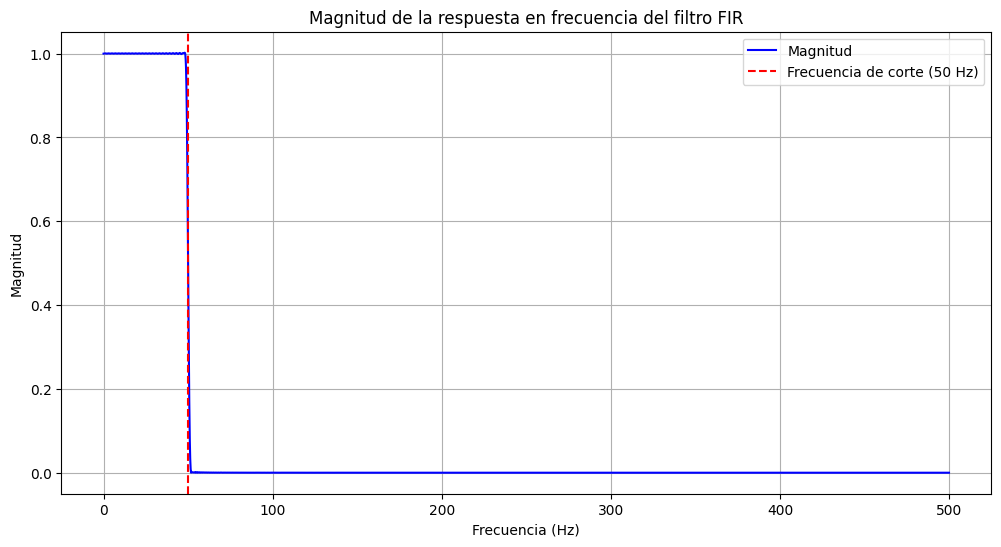

In [18]:
num_taps = 1000 # Número de coeficientes
cutoff_frequency = 50  # Frecuencia de corte en Hz
fir_coefficients = firwin(num_taps, cutoff=cutoff_frequency, fs=sampling_rate, window="hamming")

# Respuesta en frecuencia del filtro
w, h = freqz(fir_coefficients, worN=8000, fs=sampling_rate)

# Grafica de la magnitud y fase de la respuesta en frecuencia del filtro
plt.figure(figsize=(12, 6))
plt.plot(w, np.abs(h), color='blue', label="Magnitud")
plt.axvline(x=cutoff_frequency, color='red', linestyle='--', label='Frecuencia de corte (50 Hz)')
plt.title("Magnitud de la respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()

Diseñar un filtro FIR utilizando el método de mínimos cuadrados con 45 muestras en
frecuencia, 33 coeficientes y frecuencia de corte de 50 Hz. Graficar la magnitud y fase de la
respuesta en frecuencia, comparándola con la respuesta ideal

In [11]:
# Intentamos nuevamente la parte c: Diseño del filtro FIR utilizando el método de mínimos cuadrados

# Especificaciones del filtro FIR de mínimos cuadrados
num_taps = 33  # Número de coeficientes
cutoff_frequency = 50  # Frecuencia de corte en Hz
bands = [0, 50, 60, sampling_rate / 2]  # Bandas en Hz: paso bajo hasta 50 Hz y rechazo de frecuencias superiores
desired = [1, 0]  # Respuesta ideal para paso bajo

# Convertimos las bandas a valores normalizados (0 a 1, donde 1 es la mitad de la frecuencia de muestreo)
normalized_bands = [b / (sampling_rate / 2) for b in bands]

# Diseñar el filtro FIR usando mínimos cuadrados
fir_ls_coefficients = firls(num_taps, normalized_bands, desired)

# Calcular la respuesta en frecuencia del filtro de mínimos cuadrados
w_ls, h_ls = freqz(fir_ls_coefficients, worN=8000, fs=sampling_rate)

# Graficar la magnitud de la respuesta en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(w_ls, np.abs(h_ls), color='blue', label="Magnitud (Filtro Mínimos Cuadrados)")
plt.axvline(x=cutoff_frequency, color='red', linestyle='--', label='Frecuencia de corte (50 Hz)')
plt.title("Magnitud de la respuesta en frecuencia del filtro FIR (Mínimos Cuadrados)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()

# Graficar la fase de la respuesta en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(w_ls, np.angle(h_ls), color='green')
plt.title("Fase de la respuesta en frecuencia del filtro FIR (Mínimos Cuadrados)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.show()


NameError: name 'firls' is not defined

In [12]:
from scipy.fft import ifft

# Parte d: Diseño del filtro FIR utilizando el método de muestreo en frecuencia
# Frecuencia de corte y número de coeficientes
cutoff_freq = 50  # Frecuencia de corte en Hz
num_taps = 33  # Número de coeficientes del filtro

# Calcular la respuesta ideal en frecuencia para un filtro paso bajo
# 1 en la banda de paso (frecuencias menores a 50 Hz) y 0 en la banda de rechazo
freq_response = np.zeros(1024)  # Utilizamos un vector grande para obtener una buena resolución de frecuencia
cutoff_idx = int(cutoff_freq / sampling_rate * len(freq_response) * 2)  # Índice en frecuencia de corte
freq_response[:cutoff_idx] = 1  # Paso bajo hasta 50 Hz
freq_response[-cutoff_idx:] = 1  # Simetría para la parte negativa de la frecuencia

# Obtener la respuesta impulsiva aplicando la transformada inversa de Fourier
impulse_response = np.real(ifft(freq_response))  # Tomamos la parte real
fir_freq_sampled = impulse_response[:num_taps]  # Tomamos los primeros 33 coeficientes

# Calcular la respuesta en frecuencia del filtro de muestreo en frecuencia
w_fs, h_fs = freqz(fir_freq_sampled, worN=8000, fs=sampling_rate)

# Graficar la magnitud de la respuesta en frecuencia del filtro de muestreo en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(w_fs, np.abs(h_fs), color='blue', label="Magnitud (Filtro Muestreo en Frecuencia)")
plt.axvline(x=cutoff_freq, color='red', linestyle='--', label='Frecuencia de corte (50 Hz)')
plt.title("Magnitud de la respuesta en frecuencia del filtro FIR (Muestreo en Frecuencia)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()

# Graficar la fase de la respuesta en frecuencia del filtro de muestreo en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(w_fs, np.angle(h_fs), color='green')
plt.title("Fase de la respuesta en frecuencia del filtro FIR (Muestreo en Frecuencia)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.show()


NameError: name 'freqz' is not defined

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz

# Aplicar cada uno de los filtros a la señal EMG utilizando la función lfilter
# Asegúrate de cargar `emg_signal` como la señal original

# Filtro con ventana de Hamming
filtered_signal_hamming = lfilter(fir_hamming, 1, emg_signal)

# Filtro con mínimos cuadrados
filtered_signal_ls = lfilter(fir_ls_coefficients, 1, emg_signal)

# Filtro con muestreo en frecuencia
filtered_signal_freq_sampling = lfilter(fir_freq_sampled, 1, emg_signal)

# Calcular las transformadas de Fourier de las señales filtradas
freqs, emg_fft = freqz(emg_signal, worN=8000, fs=sampling_rate)
_, hamming_fft = freqz(filtered_signal_hamming, worN=8000, fs=sampling_rate)
_, ls_fft = freqz(filtered_signal_ls, worN=8000, fs=sampling_rate)
_, fs_fft = freqz(filtered_signal_freq_sampling, worN=8000, fs=sampling_rate)

# Graficar las señales filtradas en el dominio del tiempo
plt.figure(figsize=(12, 8))
plt.plot(emg_signal, color='gray', alpha=0.6, label='Señal EMG Original')
plt.plot(filtered_signal_hamming, color='blue', label='Señal Filtrada (Hamming)')
plt.plot(filtered_signal_ls, color='orange', label='Señal Filtrada (Mínimos Cuadrados)')
plt.plot(filtered_signal_freq_sampling, color='green', label='Señal Filtrada (Muestreo en Frecuencia)')
plt.title("Señales Filtradas en el Dominio del Tiempo")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# Graficar las magnitudes de las respuestas en frecuencia
plt.figure(figsize=(12, 8))
plt.plot(freqs, np.abs(emg_fft), color='gray', label='Original')
plt.plot(freqs, np.abs(hamming_fft), color='blue', label='Hamming')
plt.plot(freqs, np.abs(ls_fft), color='orange', label='Mínimos Cuadrados')
plt.plot(freqs, np.abs(fs_fft), color='green', label='Muestreo en Frecuencia')
plt.title("Magnitud de la Respuesta en Frecuencia de las Señales Filtradas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'fir_hamming' is not defined

## PREGUNTA 2

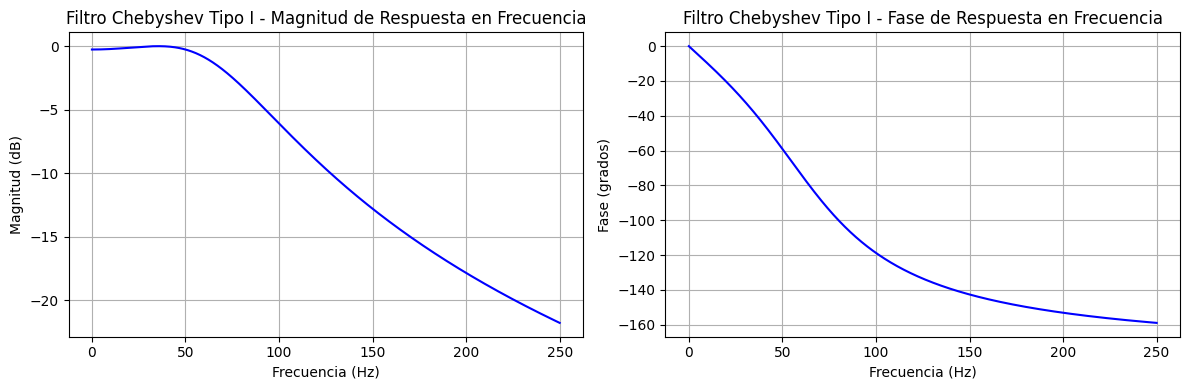

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del filtro Chebyshev tipo I
fs = 500  # frecuencia de muestreo (Hz)
fc = 50   # frecuencia de corte (Hz)
order = 2 # orden del filtro
epsilon = 0.25  # factor de ripple en la banda pasante

# Convertimos la frecuencia de corte a radianes
omg_c = 2 * np.pi * fc / fs

# Polos del filtro Chebyshev
a = np.zeros(order + 1)
a[order] = 1
Tn = np.polynomial.chebyshev.Chebyshev(a)
Tn2 = 1 + epsilon**2 * (Tn * Tn)

# Seleccionamos los polos en el lado izquierdo del plano-s (Re{s_k} < 0)
roots = np.polynomial.chebyshev.Chebyshev.roots(Tn2)
s_roots = np.sort_complex(roots * 1j * omg_c)

# Calculamos coeficientes de la expansión en fracciones parciales
ck = np.ones(order, dtype=complex) * omg_c / epsilon
for k in range(order):    
    for l in range(order):
        if k != l:
            ck[k] = ck[k] * (omg_c / 2) / (s_roots[k] - s_roots[l])

# Calculamos la respuesta en frecuencia
N = 1000
omg = np.linspace(0, np.pi, N)
Homg = 0
for k in range(order):    
    Homg += ck[k] / (1j * omg - s_roots[k])

# Graficamos la magnitud y la fase de la respuesta en frecuencia
fig = plt.figure(figsize=[12, 4])

# Magnitud en dB
plt.subplot(1, 2, 1)
plt.plot(omg * fs / (2 * np.pi), 20 * np.log10(np.abs(Homg)), 'b')
plt.title("Filtro Chebyshev Tipo I - Magnitud de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid('on')

# Fase
plt.subplot(1, 2, 2)
plt.plot(omg * fs / (2 * np.pi), np.unwrap(np.angle(Homg)) * 180 / np.pi, 'b')
plt.title("Filtro Chebyshev Tipo I - Fase de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (grados)")
plt.grid('on')

plt.tight_layout()
plt.show()


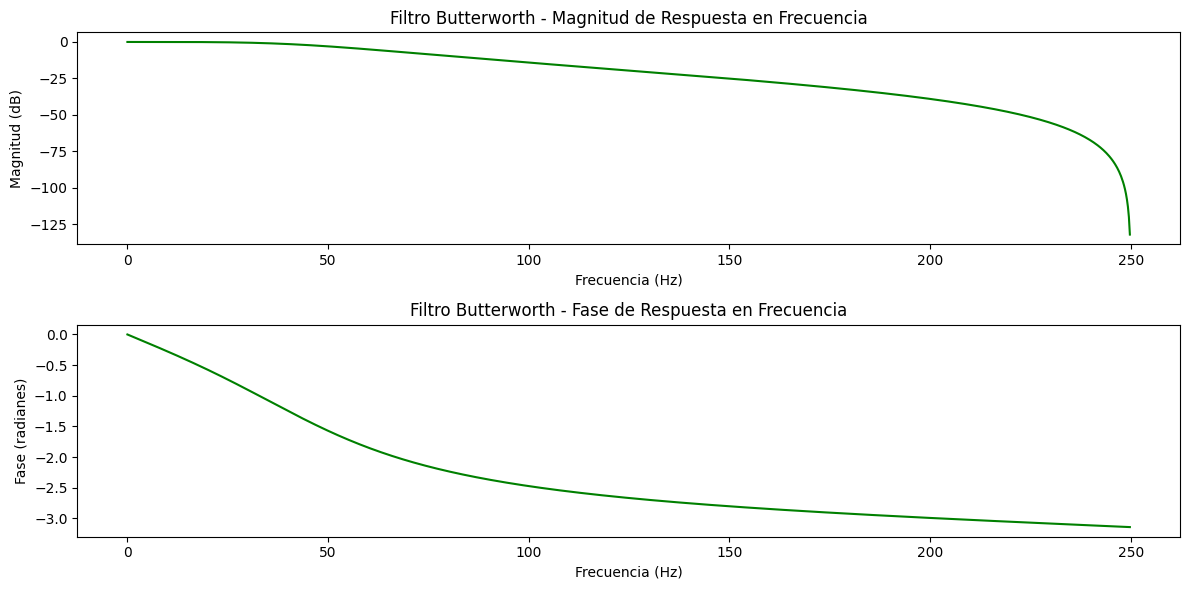

In [3]:
# b) Filtro Butterworth usando la transformación bilineal
b_butter, a_butter = signal.butter(order, fc, 'low', fs=fs)

# Cálculo de la respuesta en frecuencia
w, h_butter = signal.freqz(b_butter, a_butter, worN=1024, fs=fs)

# Gráfico de la magnitud y fase del filtro Butterworth
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h_butter)), 'g')
plt.title("Filtro Butterworth - Magnitud de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h_butter), 'g')
plt.title("Filtro Butterworth - Fase de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.tight_layout()
plt.show()

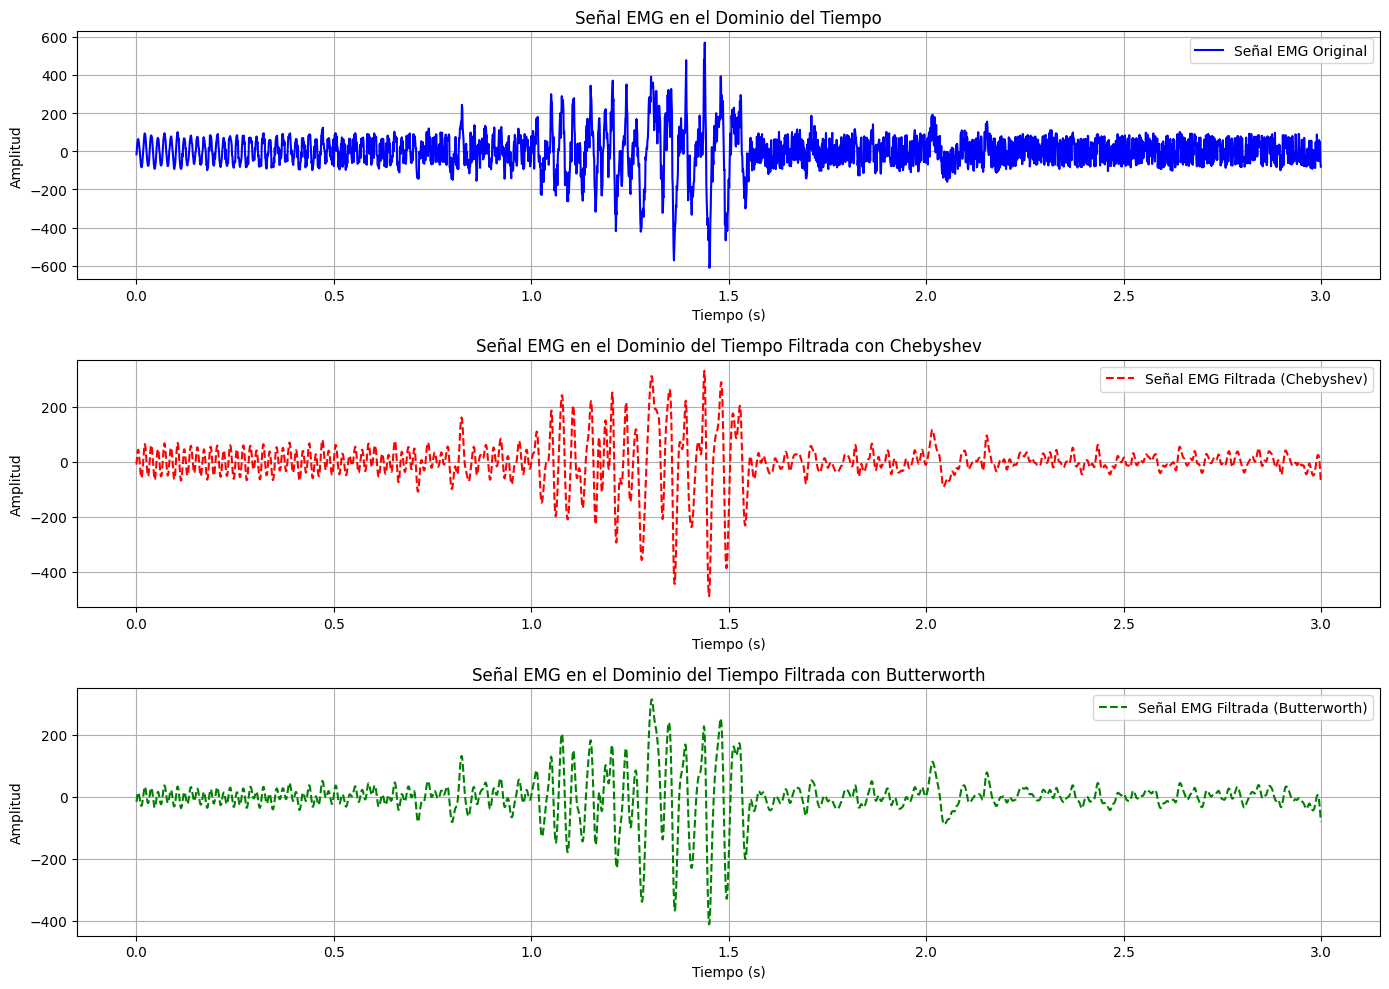

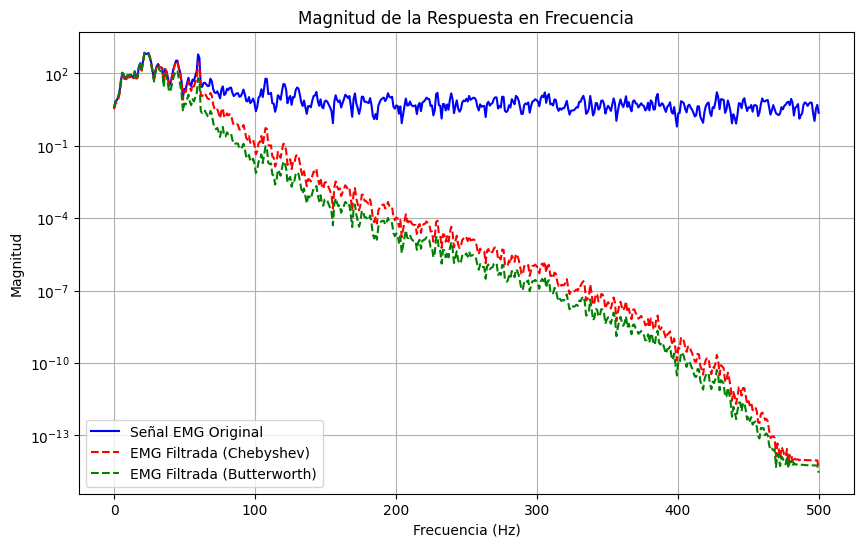

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Se carga la señal EMG
emg_signal = np.load('EMG_raw.npy')

# Parámetros de la señal y filtros
sampling_rate = 1000  # Frecuencia de muestreo en Hz
fc = 50               # Frecuencia de corte en Hz
order = 2             # Orden del filtro

# Vector de tiempo
time = np.arange(len(emg_signal)) / sampling_rate

# Diseño del filtro Chebyshev tipo I en el dominio z
nyquist = sampling_rate / 2
normalized_cutoff = fc / nyquist
b_cheby, a_cheby = signal.cheby1(order, 0.5, normalized_cutoff, btype='low', analog=False)

# Aplicación del filtro Chebyshev a la señal EMG
emg_filtered_cheby = signal.filtfilt(b_cheby, a_cheby, emg_signal)

# Diseño del filtro Butterworth en el dominio z
b_butter, a_butter = signal.butter(order, normalized_cutoff, btype='low', analog=False)

# Aplicación del filtro Butterworth a la señal EMG
emg_filtered_butter = signal.filtfilt(b_butter, a_butter, emg_signal)

# Respuesta en frecuencia de la señal original y las señales filtradas
frequencies, emg_spectrum = signal.welch(emg_signal, sampling_rate, nperseg=1024)
_, cheby_spectrum = signal.welch(emg_filtered_cheby, sampling_rate, nperseg=1024)
_, butter_spectrum = signal.welch(emg_filtered_butter, sampling_rate, nperseg=1024)

# Gráficas en el dominio del tiempo y la frecuencia
plt.figure(figsize=(14, 10))

# Señal EMG original en el dominio del tiempo
plt.subplot(3, 1, 1)
plt.plot(time, emg_signal, label="Señal EMG Original", color='blue')
plt.title("Señal EMG en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Señal EMG filtrada con Chebyshev en el dominio del tiempo
plt.subplot(3, 1, 2)
plt.plot(time, emg_filtered_cheby, label="Señal EMG Filtrada (Chebyshev)", color='red', linestyle='--')
plt.title("Señal EMG en el Dominio del Tiempo Filtrada con Chebyshev")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Señal EMG filtrada con Butterworth en el dominio del tiempo
plt.subplot(3, 1, 3)
plt.plot(time, emg_filtered_butter, label="Señal EMG Filtrada (Butterworth)", color='green', linestyle='--')
plt.title("Señal EMG en el Dominio del Tiempo Filtrada con Butterworth")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Gráfica de la magnitud en el dominio de la frecuencia
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, emg_spectrum, label="Señal EMG Original", color='blue')
plt.semilogy(frequencies, cheby_spectrum, label="EMG Filtrada (Chebyshev)", color='red', linestyle='--')
plt.semilogy(frequencies, butter_spectrum, label="EMG Filtrada (Butterworth)", color='green', linestyle='--')
plt.title("Magnitud de la Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()



## PREGUNTA 3